In [16]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizer_v1 import Adam
# from keras.preprocessing import image
# from keras.preprocessing.image import img_to_array2
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [17]:

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [18]:
# from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam,SGD
from PIL import Image

In [19]:
image_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [20]:
default_image_size = (60,60)
def convert_image_to_array(image_dir):
    # if image_dir.split('.')[-1]=='gif':
    #     images=Image.open(image_dir).convert('RGB')
    #     images = np.asarray(images)
    # elif image_dir.split('.')[-1]=='jpg' or image_dir.split('.')[-1]=='JPG' \
    # or image_dir.split('.')[-1]=='png' or image_dir.split('.')[-1]=='jpeg' or image_dir.split('.')[-1]=='jfif':
    images=Image.open(image_dir).convert('RGB')
    images = np.asarray(images)
        # images = cv2.imread(image_dir)
    # else:
    #     print('Error!')
    if images is not None :
        images = cv2.resize(images, default_image_size) 
        images = images / 225.0  
        return images
    else :
        print('Error')
        
        return np.array([])

In [21]:
print(len(os.listdir(r'C:\projects\digit_prediction\vision_verse\data\train\train\crownandrootrot')))
print(len(os.listdir(r'C:\projects\digit_prediction\vision_verse\data\train\train\healthywheat')))
print(len(os.listdir(r'C:\projects\digit_prediction\vision_verse\data\train\train\leafrust')))
print(len(os.listdir(r'C:\projects\digit_prediction\vision_verse\data\train\train\wheatloosesmut')))

548
712
712
591


In [22]:

basepath = r'C:\projects\digit_prediction\vision_verse\data\train\train'
image_list, label_list = [], []

print("[INFO] Loading images ...")
root_dir = listdir(basepath)

for plant_disease_folder in root_dir:
    print(f"[INFO] Processing {plant_disease_folder} ...")
    plant_disease_image_list = listdir(os.path.join(basepath,plant_disease_folder))

    for images in plant_disease_image_list:
        image_directory = os.path.join(basepath,plant_disease_folder,images)
        image_list.append(convert_image_to_array(image_directory))
        label_list.append(plant_disease_folder)
print("[INFO] Image loading completed")  


[INFO] Loading images ...
[INFO] Processing crownandrootrot ...


c:\projects\digit_prediction\venv\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[INFO] Processing healthywheat ...
[INFO] Processing leafrust ...
[INFO] Processing wheatloosesmut ...
[INFO] Image loading completed


In [23]:
label_binarizer = LabelEncoder()
image_labels = label_binarizer.fit_transform(label_list)
# pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['crownandrootrot' 'healthywheat' 'leafrust' 'wheatloosesmut']


In [24]:
image_list = np.array(image_list)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels,stratify=image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [13]:
# augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
#                              height_shift_range=0.1, shear_range=0.2, 
#                              zoom_range=0.2, horizontal_flip=True, 
#                              fill_mode="nearest")

In [14]:
model = Sequential()
model.add(Conv2D(input_shape=(60,60,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=250,activation="relu"))
model.add(Dense(units=50,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [15]:

opt =Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(image_list,image_labels,epochs=20,verbose=1,validation_data=(x_test,y_test))


Epoch 1/20
81/81 [==============================] - 67s 174ms/step - loss: 1.3755 - accuracy: 0.3059 - val_loss: 1.3817 - val_accuracy: 0.2768
Epoch 2/20
81/81 [==============================] - 6s 72ms/step - loss: 1.3735 - accuracy: 0.2996 - val_loss: 1.8798 - val_accuracy: 0.4074
Epoch 3/20
81/81 [==============================] - 6s 72ms/step - loss: 1.3228 - accuracy: 0.3921 - val_loss: 1.1882 - val_accuracy: 0.5010
Epoch 4/20
81/81 [==============================] - 6s 72ms/step - loss: 1.1823 - accuracy: 0.4764 - val_loss: 1.1230 - val_accuracy: 0.4854
Epoch 5/20
81/81 [==============================] - 6s 72ms/step - loss: 1.1523 - accuracy: 0.4940 - val_loss: 1.0822 - val_accuracy: 0.5302
Epoch 6/20
81/81 [==============================] - 6s 72ms/step - loss: 1.0865 - accuracy: 0.5271 - val_loss: 1.0290 - val_accuracy: 0.5556
Epoch 7/20
81/81 [==============================] - 6s 72ms/step - loss: 1.0701 - accuracy: 0.5349 - val_loss: 1.0283 - val_accuracy: 0.6199
Epoch 8/20


In [ ]:
# print(cnn.evaluate(x_test,y_test))
# cnn.fit(x_train, y_train, epochs=50,verbose=1,validation_data=(x_test,y_test))
y_pred = model.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
from sklearn.metrics import f1_score
print(f1_score(y_test,y_classes,average='weighted'))

0.9941530129804808


* 0.902479156153312
* 0.924073726300525
* 0.978598125154676
* 0.9941530129804808

In [57]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.97      0.97      0.97       143
           2       1.00      0.99      0.99       142
           3       0.98      0.97      0.97       118

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98       513



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


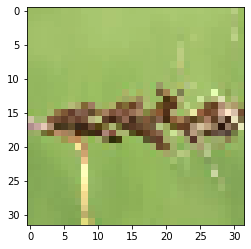

In [400]:
plt.imshow(x_test[2])

In [304]:
# cnn.save('models')

Test

In [34]:

basepath = r'C:\projects\digit_prediction\vision_verse\data\test'
timage_list, tlabel_list = [], []

print("[INFO] Loading images ...")
root_dir = listdir(basepath)

for images in root_dir:
    image_directory = os.path.join(basepath,images)
    timage_list.append(convert_image_to_array(image_directory))
print("[INFO] Image loading completed")

[INFO] Loading images ...
[INFO] Image loading completed


In [35]:
len(timage_list)

1101

In [36]:
timage_list = np.array(timage_list)

In [79]:
preds = cnn.predict(timage_list)

In [80]:
yclasses = [np.argmax(element) for element in preds]

In [81]:
import pandas as pd
classes = label_binarizer.inverse_transform(yclasses)
sub = pd.DataFrame(data={
    'path':os.listdir(basepath),
    'label':classes
})

In [82]:
sub.head()

,path,label
0,0000.jpg,crownandrootrot
1,0001.jpg,crownandrootrot
2,00010.jpg,crownandrootrot
3,000100.jpg,crownandrootrot
4,0001000.jpg,wheatloosesmut


In [83]:
sub['path'] = sub['path'].apply(lambda x: f"data/test/{x}")

In [84]:
sub.head()

,path,label
0,data/test/0000.jpg,crownandrootrot
1,data/test/0001.jpg,crownandrootrot
2,data/test/00010.jpg,crownandrootrot
3,data/test/000100.jpg,crownandrootrot
4,data/test/0001000.jpg,wheatloosesmut


In [85]:
sub.to_csv(r'C:\projects\digit_prediction\vision_verse\submissions\sub10.csv',index=False)

In [65]:
sub['label'].value_counts()

leafrust           304
healthywheat       289
crownandrootrot    274
wheatloosesmut     234
Name: label, dtype: int64